In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [52]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'sam-resources/data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Date,CityName,StateName,MedianSalePrice,Year,MedianListPrice,SalesTotal,Total Population,Median Income,MORTGAGE30US,Unemployment Rate,HAI
0,2008-02-29,United States,NaN,174000.0,2008.0,NaN,205206.0,NaN,NaN,NaN,NaN,NaN
1,2008-02-29,New York,NY,400000.0,2008.0,NaN,8591.0,NaN,NaN,NaN,NaN,NaN
2,2008-02-29,Los Angeles,CA,470000.0,2008.0,NaN,4159.0,NaN,NaN,NaN,NaN,NaN
3,2008-02-29,Chicago,IL,224000.0,2008.0,NaN,5933.0,NaN,NaN,NaN,NaN,NaN
4,2008-02-29,Dallas,TX,138000.0,2008.0,NaN,5058.0,NaN,NaN,NaN,NaN,NaN


/var/folders/yk/gblyv4gs4s5fjfks1jm4lkhw0000gp/T/ipykernel_91741/4182478179.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])


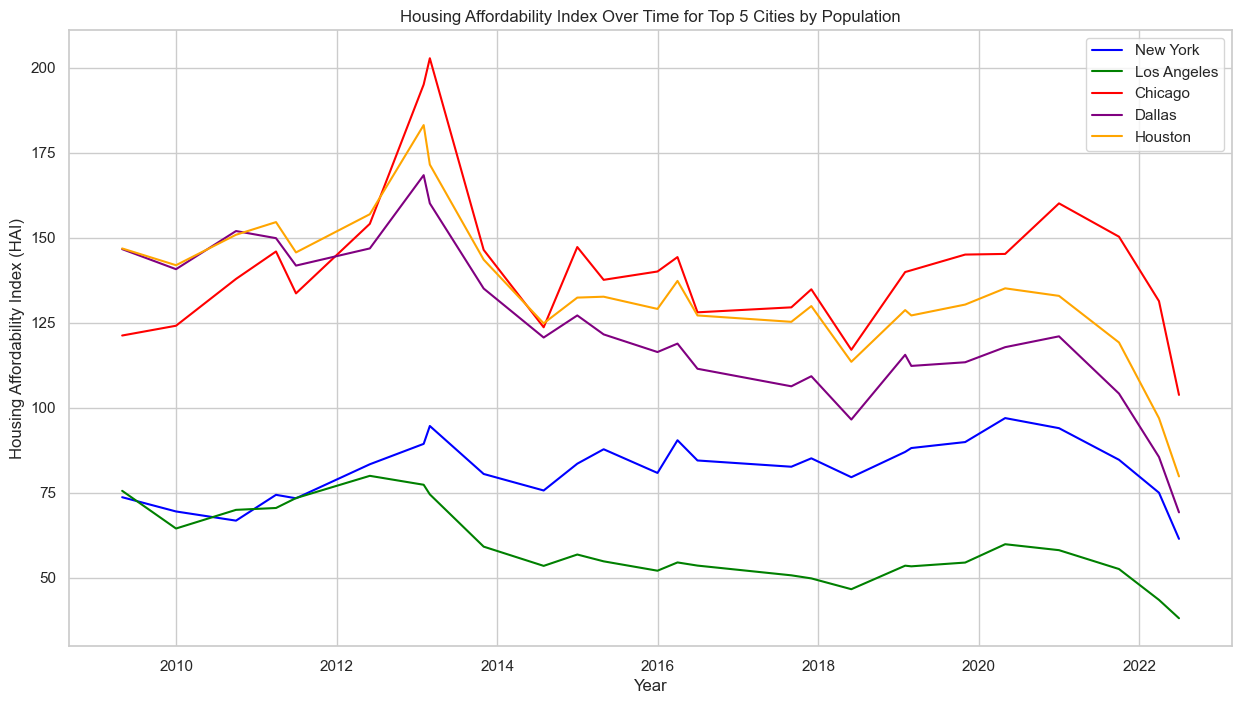

In [53]:
# Filter out the top 5 cities by population (assuming they are New York, Los Angeles, Chicago, Dallas, Houston)
top_cities = ['New York', 'Los Angeles', 'Chicago', 'Dallas', 'Houston']

# Filter the data for these cities and for non-null HAI (Housing Affordability Index) values
filtered_data = data[data['CityName'].isin(top_cities) & data['HAI'].notnull()]

# Convert Date to datetime for plotting
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

# Plotting with different colors for better differentiation
colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(15, 8))

for city, color in zip(top_cities, colors):
    city_data = filtered_data[filtered_data['CityName'] == city]
    plt.plot(city_data['Date'], city_data['HAI'], label=city, color=color)

plt.title('Housing Affordability Index Over Time for Top 5 Cities by Population')
plt.xlabel('Year')
plt.ylabel('Housing Affordability Index (HAI)')
plt.legend()
plt.grid(True)
plt.show()


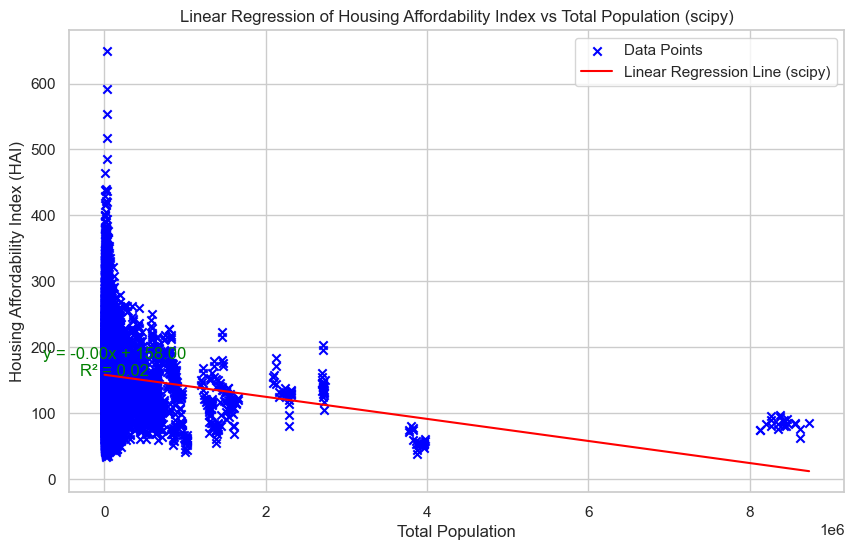

In [54]:

# Filter out rows with null values in 'Total Population' or 'HAI'
regression_data = data[['Total Population', 'HAI']].dropna()

# Using scipy for linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(regression_data['Total Population'], regression_data['HAI'])

# Generate predictions for plotting using scipy
X_pred = np.linspace(regression_data['Total Population'].min(), regression_data['Total Population'].max(), 100).reshape(-1, 1)
y_pred_scipy = slope * X_pred + intercept

# Plotting with scipy regression results
plt.figure(figsize=(10, 6))
plt.scatter(regression_data['Total Population'], regression_data['HAI'], color='blue', label='Data Points', marker='x')
plt.plot(X_pred, y_pred_scipy, color='red', label='Linear Regression Line (scipy)')

# Adding the regression equation and R-squared value
regression_text_scipy = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}'

# Position the text in the center of the plot
plt.text(regression_data['Total Population'].mean(), regression_data['HAI'].mean(), regression_text_scipy, fontsize=12, ha='center', color='green')

plt.title('Linear Regression of Housing Affordability Index vs Total Population (scipy)')
plt.xlabel('Total Population')
plt.ylabel('Housing Affordability Index (HAI)')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/yk/gblyv4gs4s5fjfks1jm4lkhw0000gp/T/ipykernel_91741/1582609645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Date'] = pd.to_datetime(sales_data['Date'])


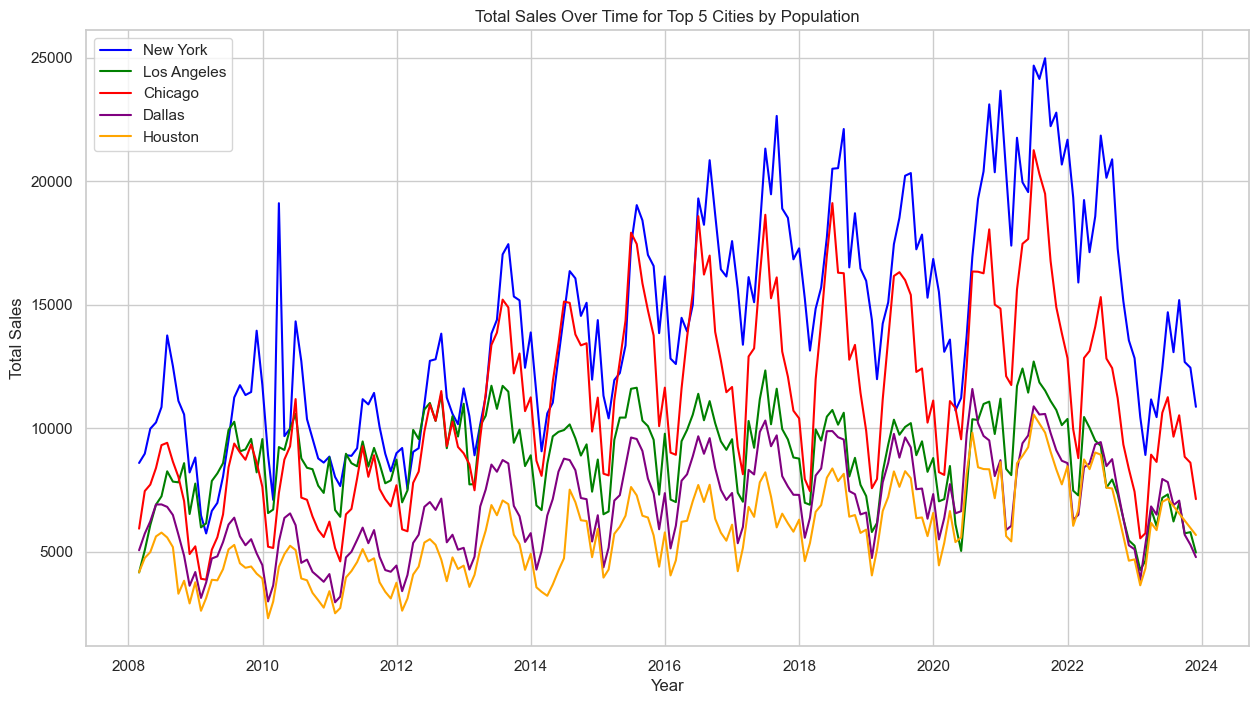

In [55]:

# Filter the data for total sales in the top 5 cities by population (New York, Los Angeles, Chicago, Dallas, Houston)
# and for non-null SalesTotal values
sales_data = data[data['CityName'].isin(['New York', 'Los Angeles', 'Chicago', 'Dallas', 'Houston']) & data['SalesTotal'].notnull()]

# Convert Date to datetime for plotting
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Plotting total sales over time for each city with different colors
colors_for_sales = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(15, 8))

for city, color in zip(['New York', 'Los Angeles', 'Chicago', 'Dallas', 'Houston'], colors_for_sales):
    city_sales_data = sales_data[sales_data['CityName'] == city]
    plt.plot(city_sales_data['Date'], city_sales_data['SalesTotal'], label=city, color=color)

plt.title('Total Sales Over Time for Top 5 Cities by Population')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
# flip the

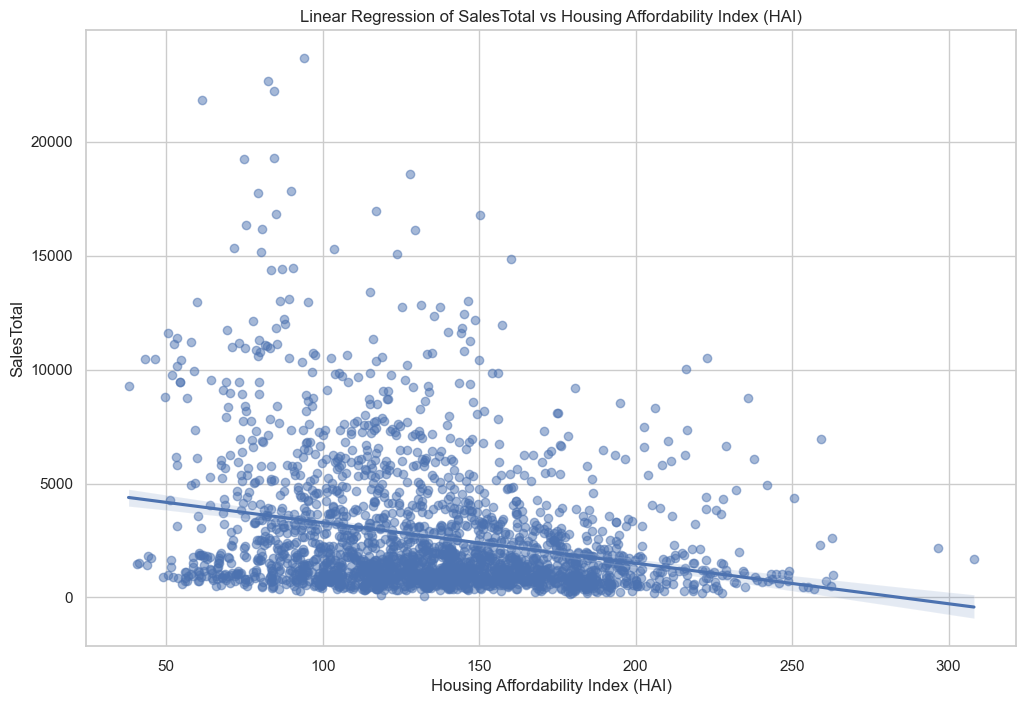

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the columns for linear regression
x = dfn['HAI']
y = dfn['SalesTotal']  # Housing Affordability Index

# Creating the plot with a linear regression line
plt.figure(figsize=(12, 8))
sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5})
plt.title('Linear Regression of SalesTotal vs Housing Affordability Index (HAI)')
plt.xlabel('Housing Affordability Index (HAI)')
plt.ylabel('SalesTotal')
plt.grid(True)
plt.show()


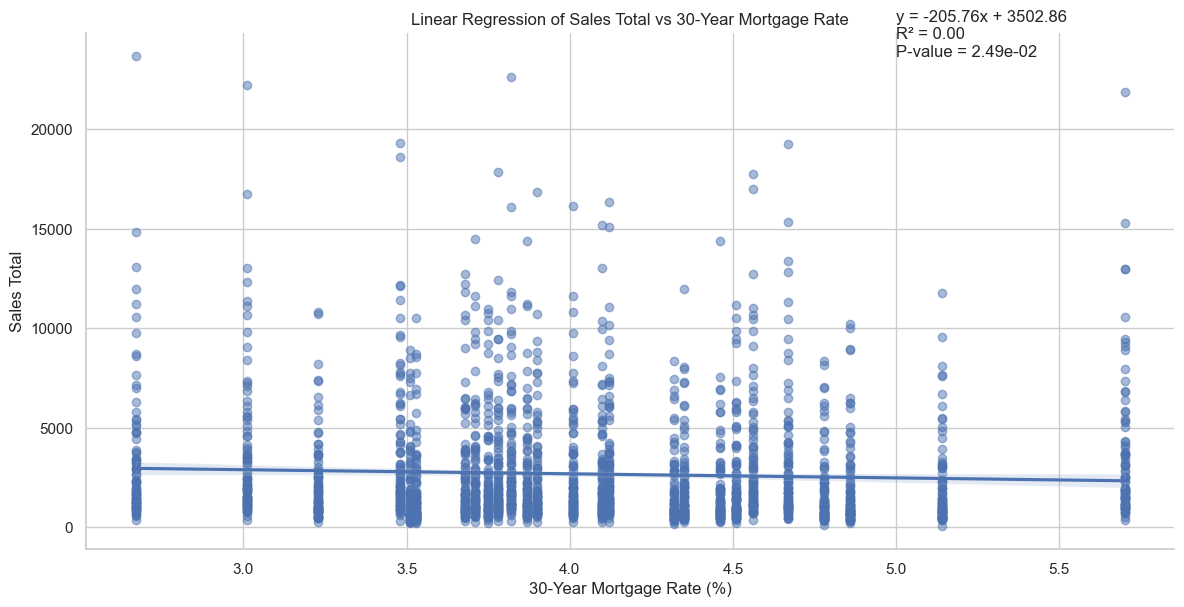

In [58]:
# Filter out rows with missing values in 'SalesTotal' or 'MORTGAGE30US' (30-year mortgage rate)
df_filtered_interest_rate = dfn.dropna(subset=['SalesTotal', 'MORTGAGE30US'])

# Linear regression using Seaborn
plot_interest_rate = sns.lmplot(x='MORTGAGE30US', y='SalesTotal', data=df_filtered_interest_rate, aspect=2, height=6, scatter_kws={'alpha':0.5})

# Extracting regression line data for interest rate
slope_interest_rate, intercept_interest_rate, r_value_interest_rate, p_value_interest_rate, std_err_interest_rate = stats.linregress(df_filtered_interest_rate['MORTGAGE30US'], df_filtered_interest_rate['SalesTotal'])

# Annotate with regression info
plt.title('Linear Regression of Sales Total vs 30-Year Mortgage Rate')
plt.xlabel('30-Year Mortgage Rate (%)')
plt.ylabel('Sales Total')
plt.text(5, max(df_filtered_interest_rate['SalesTotal']), f'y = {slope_interest_rate:.2f}x + {intercept_interest_rate:.2f}\nR² = {r_value_interest_rate**2:.2f}\nP-value = {p_value_interest_rate:.2e}')

# Show plot
plt.show()


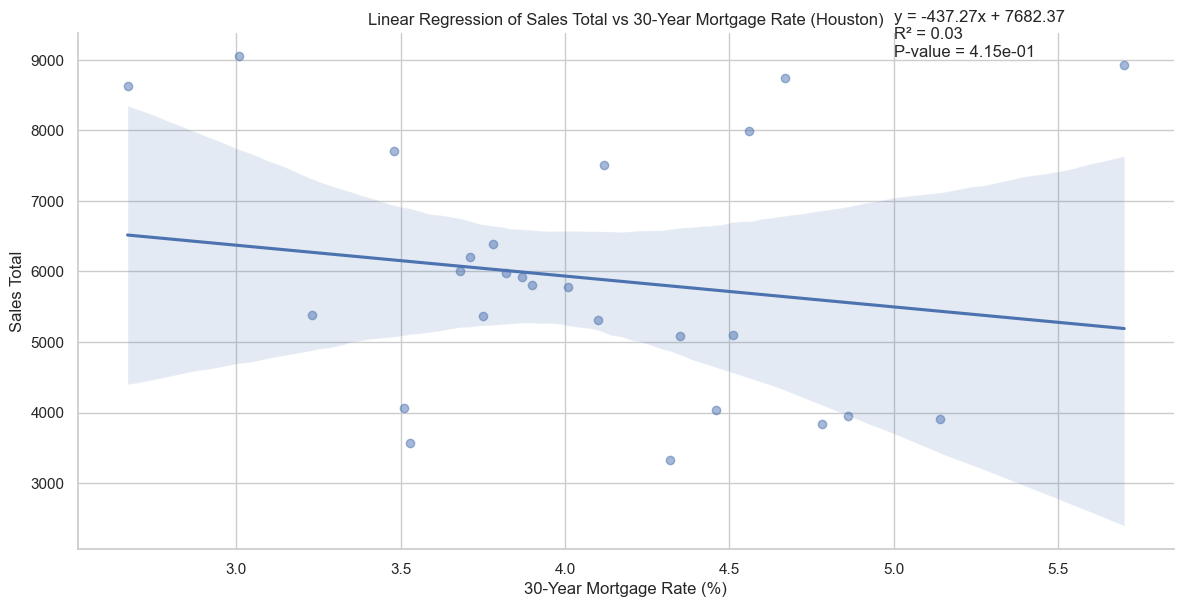

In [59]:
# Filter data for Houston and for non-missing values in 'SalesTotal' and 'MORTGAGE30US'
df_houston = dfn[(dfn['CityName'] == 'Houston') & dfn['SalesTotal'].notna() & dfn['MORTGAGE30US'].notna()]

# Linear regression using Seaborn for Houston data
plot_houston = sns.lmplot(x='MORTGAGE30US', y='SalesTotal', data=df_houston, aspect=2, height=6, scatter_kws={'alpha':0.5})

# Extracting regression line data for Mortgage Rate in Houston
slope_houston, intercept_houston, r_value_houston, p_value_houston, std_err_houston = stats.linregress(df_houston['MORTGAGE30US'], df_houston['SalesTotal'])

# Annotate with regression info for Houston
plt.title('Linear Regression of Sales Total vs 30-Year Mortgage Rate (Houston)')
plt.xlabel('30-Year Mortgage Rate (%)')
plt.ylabel('Sales Total')
plt.text(5, max(df_houston['SalesTotal']), f'y = {slope_houston:.2f}x + {intercept_houston:.2f}\nR² = {r_value_houston**2:.2f}\nP-value = {p_value_houston:.2e}')

# Show plot
plt.show()


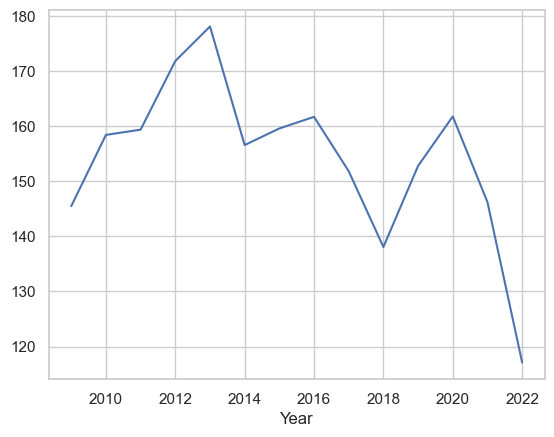

In [60]:
# Line plot of the average housing affordability index by year
df.groupby('Year')['HAI'].mean().plot()
plt.show()


In [61]:
# Load new data
df2 = pd.read_csv('sam-resources/census_data_2009-2022ksada.csv')

df2.head()

,City,Total Population,Total Labor Force,Unemployed Labor Force,Median Income,Year
0,"Pine Flat CDP, CA",114,22.0,4.0,15724.0,2011
1,"Pine Grove CDP, CA",2573,1098.0,64.0,52917.0,2011
2,"Pine Mountain Lake CDP, CA",2695,942.0,100.0,54200.0,2011
3,"Piñon Hills CDP, CA",6130,2510.0,503.0,38140.0,2011
4,"Pioneer CDP, CA",1226,621.0,109.0,42917.0,2011
